<a href="https://colab.research.google.com/github/emad-askari/emad-askari/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


$\Large{Gradient\ Descent}$

---

$X_{i+1} = X_{i} - 𝛾 . ∇f(X_i)$

```python
def gradient_descent(cost_func, iter, threshold, learning_rate, h, x0):
  ...
  return x, cost
```

$^* derivations\ are\ refined\ by\ Richardson's\ method$

>$\underline{\large{Inputs;}}\\
- cost\underline\ func= the\ function\ we\ want\ to\ minimize\\
- iter= maximum\ number\ of\ iterations\\
- threshold= the\ code\ stops\ if\ the\ difference\ between\ two\ consecutive\ variables\ drop\ below\ this\ value \\
- learning\underline\ rate= how\ much\ leaning\ to\ the\ conter-gradient\ direction\\
- h= step\ size\ for\ derivations\\
- x_0= initial\ guess$

>$\underline{\large{Outpus;}}\\
- x= matrix\ of\ variables\ in\ each\ iteration\\
- cost= cost\ function\ in\ each\ iteration\\
$

In [27]:
def gradient_descent(cost_func, iter, threshold, learning_rate, h, x0):
  import numpy as np

  m    = np.size(x0)
  x    = x0.reshape([m,1])
  cost = cost_func(x)

  flag = 0
  for i in range(iter-1):
    df_h  = ( cost_func(x[:,i]+h)-cost_func(x[:,i]) )/(h)
    df_h2 = ( cost_func(x[:,i]+h/2)-cost_func(x[:,i]) )/(h/2)

    df_h_richardson = df_h2 - ( df_h2-df_h )/(2-1)

    x_next = x[:,i] - learning_rate * df_h_richardson.reshape([m,1])

    if np.sum(x_next**2)**.5 / np.sum(x[:,i]**2)**.5 > 1e5:
      flag=3
      print('the results diverged!')
      break

    x    = np.append(   x,    x_next , axis=1)
    cost = np.append(cost, cost_func(x_next), axis=1)

    if ( (x[:,i+1]-x[:,i]).T.dot(x[:,i+1]-x[:,i]) )**.5 < threshold:
      flag=1
      break


  print('optimum values \t = \t'+str(np.round(x[:,-1].reshape(1,m),2)))
  print('optimum cost \t= \t'+str(np.round(cost[:,-1].reshape(1,m),2)))
  print('number of iterations = '+str(i))

  if flag==1:
    print('stopped by: difference of consecutive values droped below the threshold (' + str(threshold)+')')
  elif flag==0:
    print('stopped by: number of iterations exceeded the given value (' + str(iter)+')')


  return x, cost


optimum value 	 = 	[[4.36]]
optimum cost 	= 	[[-7.94]]
number of iterations = 8
stopped by: difference of consecutive values droped below the threshold (0.01)


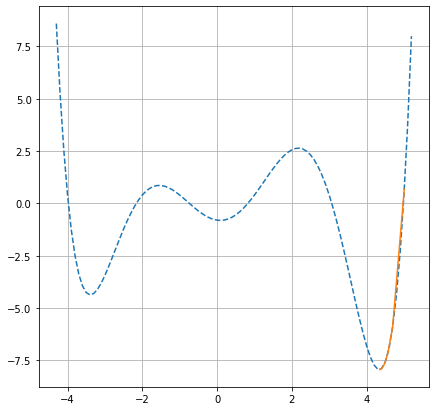

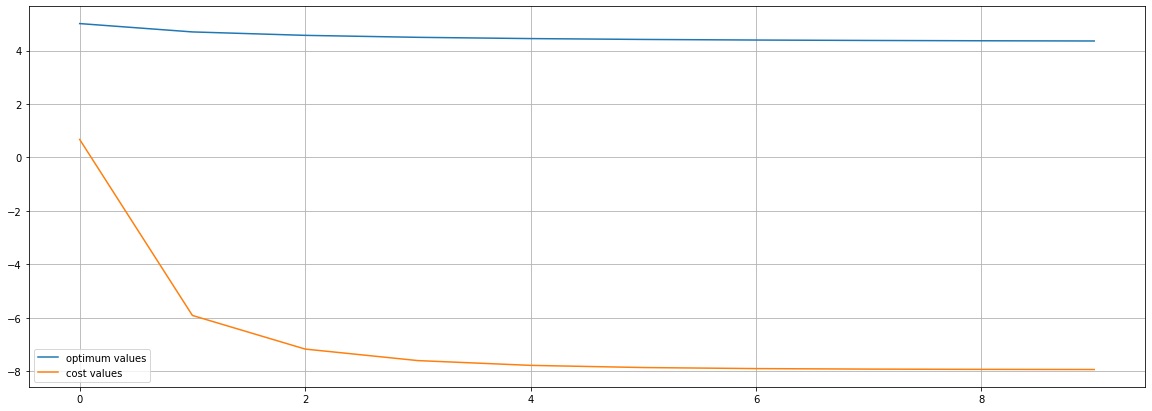

In [29]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-4.3, 5.3, .1)
fn = lambda x: (x**6 - 2*x**5 - 26*x**4 + 28*x**3 + 145*x**2 - 26*x - 80) /100

x, cost = gradient_descent(cost_func=fn, iter=500, threshold=0.01, learning_rate=.01, h=0.01, x0=np.random.uniform(-5, +6, 1))

plt.figure(1, [7,7])
plt.plot(t, fn(t), '--')
plt.plot(x[0,:], cost[0,:], linewidth = 1.5)
plt.grid()
plt.show()

plt.figure(2, [20, 7])
plt.plot(x[0,:], label='optimum values')
plt.plot(cost[0,:], label='cost values')
plt.legend()
plt.grid()
plt.show()
